In [1974]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.metrics import accuracy_score

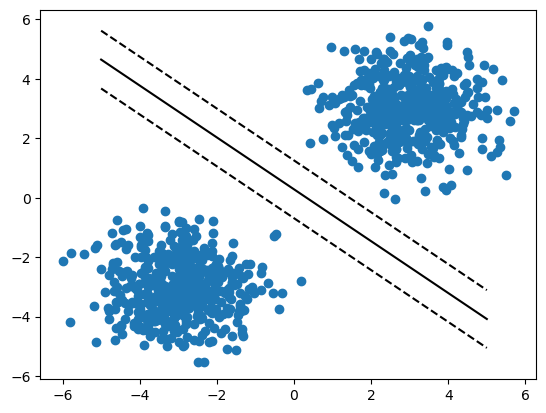

In [1975]:
##Question 2e Graphing##
import matplotlib.pyplot as plt
import numpy as np

toy_data = np.load('data/toy-data.npz')
data = toy_data['training_data']
labels = toy_data['training_labels']

w = np.array([-0.4528, -0.5190])
alpha = 0.1471

plt.scatter(data[:, 0], data[:, 1])

# Plot decision boundary
x = np.linspace(-5, 5, 100)
y = -(w[0] * x + alpha) / w[1]
plt.plot(x, y, 'k-')

y_top = y + np.sum(w)
y_bot = y - np.sum(w)
plt.plot(x, y_top, 'k--')
plt.plot(x, y_bot, 'k--')

plt.show()

In [1976]:
##Question 3##
def datapartitionMnist():
    mnist_data = np.load('data/mnist-data.npz')
    
    mnist_training_data = mnist_data['training_data']
    mnist_training_labels = mnist_data['training_labels']
    mnist_test_data = mnist_data['test_data']
    
    mnist_training_data_flat = mnist_training_data.reshape(mnist_training_data.shape[0], -1)
    
    mnist_data_combined = np.column_stack((mnist_training_data_flat, mnist_training_labels))
    
    np.random.shuffle(mnist_data_combined)
    
    mnist_validation_data = mnist_data_combined[:10000, :-1]
    mnist_validation_labels = mnist_data_combined[:10000, -1]
    mnist_training_data = mnist_data_combined[10000:, :-1]
    mnist_training_labels = mnist_data_combined[10000:, -1]
    
    return mnist_training_data, mnist_training_labels, mnist_validation_data, mnist_validation_labels

def dataPartitionSpam():
    spam_data = np.load('data/spam-data.npz')
        
    spam_training_data = spam_data['training_data']
    spam_training_labels = spam_data['training_labels']
    spam_test_data = spam_data['test_data']
    
    combined_spam_data = np.column_stack((spam_training_data, spam_training_labels))
    np.random.shuffle(combined_spam_data)
    split = int(0.2 * len(combined_spam_data))
    
    spam_validation_data = combined_spam_data[:split, :-1]
    spam_validation_labels = combined_spam_data[:split, -1]
    spam_training_data = combined_spam_data[split:, :-1]
    spam_training_labels = combined_spam_data[split:, -1]
    
    return spam_training_data, spam_training_labels, spam_validation_data, spam_validation_labels

def accuracy(true_labels, predicted_labels):
    return np.sum((np.array(true_labels) == np.array(predicted_labels)))/len(true_labels)

/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


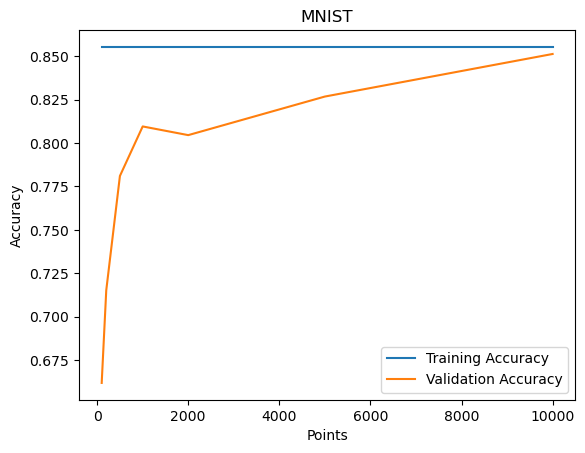

In [1985]:
##Question 4 Mnist##
def train_and_evaluate_svm(training_data, training_labels, validation_data, validation_labels, n):
    training_data_subset = training_data[:n]
    training_labels_subset = training_labels[:n]
    
    training_data_flat = training_data_subset.reshape(n, -1)
    validation_data_flat = validation_data.reshape(validation_data.shape[0], -1)
    
    svm = LinearSVC(dual=True)
    svm.fit(training_data_flat, training_labels_subset)
    
    training_guess = svm.predict(training_data_flat)
    validation_guess = svm.predict(validation_data_flat)

    training_accuracy = accuracy(training_labels_subset, training_guess)
    validation_accuracy = accuracy(validation_labels, validation_guess)

    return training_accuracy, validation_accuracy

a = [100, 200, 500, 1000, 2000, 5000, 10000]

training_data, training_labels, validation_data, validation_labels = datapartitionMnist()

training_accuracies = []
validation_accuracies = []

for i in a:
    training_acc, validation_acc = train_and_evaluate_svm(training_data, training_labels, validation_data, validation_labels, i)
    training_accuracies.append(train_acc)
    validation_accuracies.append(validation_acc)

plt.title('MNIST')
plt.plot(points, training_accuracies, label='Training Accuracy')
plt.plot(points, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Points')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarni

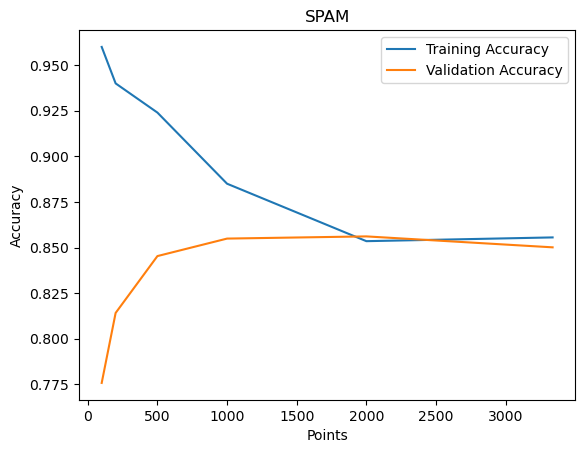

In [1986]:
##Question 4 Spam##
def train_and_evaluate_svm(training_data, training_labels, validation_data, validation_labels, n):
    training_data_subset = training_data[:n]
    training_labels_subset = training_labels[:n]
    
    training_data_flat = training_data_subset.reshape(n, -1)
    validation_data_flat = validation_data.reshape(validation_data.shape[0], -1)
    
    svm = LinearSVC(dual=True)
    svm.fit(training_data_flat, training_labels_subset)
    
    training_predictions = svm.predict(training_data_flat)
    validation_predictions = svm.predict(validation_data_flat)

    training_accuracy = accuracy(training_labels_subset, training_predictions)
    validation_accuracy = accuracy(validation_labels, validation_predictions)

    return training_accuracy, validation_accuracy

a = [100, 200, 500, 1000, 2000, 3337]

train_data, train_labels, validation_data, validation_labels = dataPartitionSpam()

train_accuracies = []
validation_accuracies = []

for i in a:
    train_acc, validation_acc = train_and_evaluate_svm(train_data, train_labels, validation_data, validation_labels, i)
    train_accuracies.append(train_acc)
    validation_accuracies.append(validation_acc)

plt.plot(sample_sizes, train_accuracies, label='Training Accuracy')
plt.plot(sample_sizes, validation_accuracies, label='Validation Accuracy')
plt.title('SPAM')
plt.xlabel('Points')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [1979]:
##Problem 5##
def train_and_evaluate_svm_hyper(training_data, training_labels, validation_data, validation_labels, n):
    flat_training_data = training_data.reshape(training_data.shape[0], -1)
    flat_validation_data = validation_data.reshape(validation_data.shape[0], -1)

    svm = LinearSVC(C=n)
    svm.fit(flat_training_data, training_labels)

    validation_predictions = svm.predict(flat_validation_data)

    validation_accuracy = accuracy(validation_labels, validation_predictions)

    return validation_accuracy

a = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]  # 0.000001
training_data, training_labels, validation_data, validation_labels = datapartitionMnist()
validation_results = []

for i in a:
    validation_acc = train_and_evaluate_svm_hyper(training_data[:10000], training_labels[:10000],
        validation_data, validation_labels, i)

    validation_results.append(validation_acc)

print(validation_results)

/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to 

[0.8677, 0.8334, 0.8404, 0.8501, 0.8477, 0.8436, 0.8472, 0.8452]


/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [1980]:
##Problem 6##
def load_spam_data():
    spam_training_data, spam_training_labels, spam_validation_data, spam_validation_labels = dataPartitionSpam()
    return spam_training_data, spam_training_labels

def k_fold_cross_validation(training_data, training_labels, n): #No need for k
    combined_data = np.column_stack((training_data, training_labels))
    np.random.shuffle(combined_data)

    shuffled_training_data = combined_data[:, :-1]
    shuffled_training_labels = combined_data[:, -1]

    fold_size = len(shuffled_training_data) // 5

    results = []

    for j in n:
        accuracies = []

        for i in range(5):
            validation_data = shuffled_training_data[i * fold_size : (i + 1) * fold_size]
            validation_labels = shuffled_training_labels[i * fold_size : (i + 1) * fold_size]

            training_data = np.concatenate([shuffled_training_data[:i * fold_size], shuffled_training_data[(i + 1) * fold_size:]])
            training_labels = np.concatenate([shuffled_training_labels[:i * fold_size], shuffled_training_labels[(i + 1) * fold_size:]])

            svm = LinearSVC(C=j, dual=True)
            svm.fit(training_data, training_labels)

            validation_guess = svm.predict(validation_data)

            fold_acc = accuracy(validation_labels, validation_guess)
            accuracies.append(fold_acc)

        avg_accuracy = np.mean(accuracies)

        results.append(avg_accuracy)

    return results

l = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

spam_training_data, spam_training_labels = load_spam_data()

cross_validation_results = k_fold_cross_validation(spam_training_data, spam_training_labels, l)

print(cross_validation_results)

/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarni

[0.7172413793103448, 0.7559220389805097, 0.7991004497751125, 0.8125937031484257, 0.8299850074962519, 0.8410794602698651, 0.8461769115442278, 0.8515742128935532, 0.8233883058470765, 0.7904047976011993, 0.7940029985007495]


/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [1981]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')

In [1987]:
##Question 7 Mnist DataSet##
def datapartitionMnistKaggle():
    d = 10000
    
    mnist_data = np.load('data/mnist-data.npz')
    
    mnist_training_data = mnist_data['training_data']
    mnist_training_labels = mnist_data['training_labels']
    mnist_test_data = mnist_data['test_data']
    
    mnist_training_data_flat = mnist_training_data.reshape(mnist_training_data.shape[0], -1)
    
    mnist_data_combined = np.column_stack((mnist_training_data_flat, mnist_training_labels))
    
    np.random.shuffle(mnist_data_combined)
    
    mnist_validation_data = mnist_data_combined[:d, :-1]
    mnist_validation_labels = mnist_data_combined[:d, -1]
    mnist_training_data = mnist_data_combined[d:, :-1]
    mnist_training_labels = mnist_data_combined[d:, -1]
    
    return mnist_training_data, mnist_training_labels, mnist_validation_data, mnist_validation_labels, mnist_test_data

def train_and_evaluate_svm(training_data, training_labels, validation_data, validation_labels, n, test_data):
    training_data_subset = training_data[:n]
    training_labels_subset = training_labels[:n]
    
    flat_training_data = training_data_subset.reshape(n, -1)
    flat_validation_data = validation_data.reshape(validation_data.shape[0], -1)
    
    svm = LinearSVC(C=0.000001, dual=False)
    svm.fit(flat_training_data, training_labels_subset)
    
    validation_guess = svm.predict(flat_validation_data)
    ed
    validation_acc = accuracy_score(validation_labels, validation_guess)
    print("Validation Accuracy:", validation_acc)
    
    flat_test_data = test_data.reshape(test_data.shape[0], -1)
    results_to_csv(svm.predict(flat_test_data))

training_data, training_labels, validation_data, validation_labels, test_data = datapartitionMnistKaggle()
train_and_evaluate_svm(training_data, training_labels, validation_data, validation_labels, 50000, test_data)

print("Done")

Validation Accuracy: 0.9068
Done


In [1983]:
##Question 7 Spam##
def dataPartitionSpamKaggle():
    spam_data = np.load('data/spam-data.npz')
        
    spam_training_data = spam_data['training_data']
    spam_training_labels = spam_data['training_labels']
    spam_test_data = spam_data['test_data']
    
    combined_spam_data = np.column_stack((spam_training_data, spam_training_labels))
    np.random.shuffle(combined_spam_data)
    split = int(0.2 * len(combined_spam_data))
    
    spam_validation_data = combined_spam_data[:split, :-1]
    spam_validation_labels = combined_spam_data[:split, -1]
    spam_training_data = combined_spam_data[split:, :-1]
    spam_training_labels = combined_spam_data[split:, -1]
    
    return spam_training_data, spam_training_labels, spam_validation_data, spam_validation_labels, spam_test_data

def train_and_evaluate_svm_Spam(training_data, training_labels, validation_data, validation_labels, test_data):
    flat_training_data = training_data.reshape(training_data.shape[0], -1)
    flat_validation_data = validation_data.reshape(validation_data.shape[0], -1)
    flat_test_data = test_data.reshape(test_data.shape[0], -1)
    
    svm = LinearSVC(C=10, dual=False)
    
    svm.fit(flat_training_data, training_labels)
    
    validation_guess = svm.predict(flat_validation_data)
    
    validation_acc = accuracy_score(validation_labels, validation_guess)
    print("Validation Accuracy:", validation_acc)

    results_to_csv(svm.predict(flat_test_data))

training_data, training_labels, validation_data, validation_labels, test_data = dataPartitionSpamKaggle()
train_and_evaluate_svm_Spam(training_data, training_labels, validation_data, validation_labels, test_data)

Validation Accuracy: 0.8657074340527577
